# Nanodegree Engenheiro de Machine Learning
## Modelo de Avaliação e Validação
## Projeto 1: Estimando Preços dos Imóveis de Boston

Bem-vindo ao primeiro projeto do Nanodegree de Engenheiro de Machine Learning! Neste Notebook, alguns templates de código estão sendo fornecidos para você, e você irá precisar implementar funcionalidades adicionais para completar este projeto com sucesso. Você não vai precisar modificar o código que foi incluído além do que está sendo pedido. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código seguinte vai exigir que você providencie funcionalidade adicional. Instruções serão fornecidas para cada seção e as especificidades da implementação são marcadas no bloco de código com o comando 'TODO'. Não esqueça de ler as instruções atentamente!

Além do código implementado, haverá questões relacionadas com o projeto e sua implementação que você deve responder. Cada seção em que há uma questão para você responder, ela será precedida por **'Questão X'** no cabeçalho. Leia cada questão cuidadosamente e dê respostas completas no seguinte box de texto que contém **'Resposta: '**. O projeto enviado será avaliado com base nas respostas para cada uma das questões e a implementação que você nos forneceu.  

>**Nota:** Células de Código e de Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas ao clicar normalmente duas vezes na célula para entrar no modo de edição.

## Começando
Neste projeto, você irá avaliar o desempenho e o poder de estimativa de um modelo que foi treinado e testado em dados coletados dos imóveis dos subúrbios de Boston, Massachusetts. Um modelo preparado para esses dados e visto como *bem ajustado* pode ser então utilizado para certas estimativas sobre um imóvel – em particular, seu valor monetário. Esse modelo seria de grande valor para alguém como um agente mobiliário, que poderia fazer uso dessas informações diariamente.

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **aberrante** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston, além de algumas bibliotecas de Python necessárias para este projeto. Você vai saber que o conjunto de dados carregou com sucesso se o seu tamanho for reportado.

In [14]:
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Êxito
print "O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape)

O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


## Explorando os Dados
Na primeira seção deste projeto, você fará uma rápida investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

### Implementação: Calcular Estatísticas
Para a sua primeira implementação de código, você vai calcular estatísticas descritivas sobre preços dos imóveis de Boston. Dado que o `numpy` já foi importado para você, use essa biblioteca para executar os cálculos necessários. Essas estatísticas serão extremamente importantes depois para analisar várias estimativas resultantes do modelo construído.

Na célula de código abaixo, você precisará implementar o seguinte:
- Calcular o mínimo, o máximo, a média, a mediana e o desvio padrão do `'MEDV'`, que está armazenado em `prices`.
  - Armazenar cada cálculo em sua respectiva variável.

In [3]:
# Preço mínimo dos dados
minimum_price = np.amin(prices)

# Preço máximo dos dados
maximum_price = np.amax(prices)

# Preço médio dos dados
mean_price = np.mean(prices)

# Preço mediano dos dados
median_price = np.median(prices)

# Desvio padrão do preço dos dados
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print "Estatísticas para os dados dos imóveis de Boston:\n"
print "Preço mínimo: ${:,.2f}".format(minimum_price)
print "Preço máximo: ${:,.2f}".format(maximum_price)
print "Preço médio: ${:,.2f}".format(mean_price)
print "Preço mediano: ${:,.2f}".format(median_price)
print "Desvio padrão dos preços: ${:,.2f}".format(std_price)

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


### Questão 1 - Observação de Atributos
Para lembrar, estamos utilizando três atributos do conjunto de dados dos imóveis de Boston: 'RM'`, `'LSTAT'` e `'PTRATIO'`. Para cada observação de dados (vizinhança):
- `'RM'` é o número médio de quartos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.

_Utilizando sua intuição, para cada um dos atributos acima, você acha que um aumento no seu valor poderia levar a um **aumento** no valor do `'MEDV'` ou uma **diminuição** do valor do `'MEDV'`? Justifique sua opinião para cada uma das opções._  
**Dica:** Você espera que um imóvel que tem um valor `'RM'` de 6 custe mais ou menos que um imóvel com valor `'RM'` de 7?

**Resposta: **

**'RM'**: Se partimos do princípio que, em geral, um número maior de quartos em um imóvel implica em uma área maior, e que uma área maior implica em um maior valor, poderíamos pensar que quanto maior for o número médio de quartos em uma vizinhança, maior será a média da área por imóvel, e consequentemente a média de valor. Logo, intuitivamente, um valor de 'RM' maior leva a um **aumento** de 'MEDV'.

**'LSTAT'**: Considerando que proprietários de classes menos abastadas, em geral, vivem em imóveis mais modestos e de menor custo, podemos supor que uma maior porcentagem de tais proprietários em uma vizinhança implica em um menor custo médio por imóvel. Logo, intuitivamente, um valor de 'LSTAT' maior leva a uma **diminuição** de 'MEDV'.

**'PTRATIO'**: Pode-se dizer que, um número menor de alunos por professor em uma vizinhança representa um maior número de escolas em uma vizinhança. Mais escolas implica em maior atratividade para uma dada vizinhança, o que acarreta aumento do custo dos imóveis. Logo, intuitivamente, um valor de 'PTRATIO' maior leva a um **diminuição** de 'MEDV'.

----

## Desenvolvendo um Modelo
Na segunda seção deste projeto, você vai desenvolver ferramentas e técnicas necessárias para um modelo que faz estimativas. Ser capaz de fazer avaliações precisas do desempenho de cada modelo através do uso dessas ferramentas e técnicas ajuda a reforçar a confiança que você tem em suas estimativas.

### Implementação: Definir uma Métrica de Desempenho
É difícil medir a qualidade de um modelo dado sem quantificar seu desempenho durante o treinamento e teste. Isso é geralmente feito utilizando algum tipo de métrica de desempenho, através do cálculo de algum tipo de erro, qualidade de ajuste, ou qualquer outra medida útil. Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.wikipedia.org/wiki/R%C2%B2), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente da determinação para um modelo é uma estatística útil em análise regressa, como se ele frequentemente descrevesse como "good" a capacidade do modelo de fazer estimativas. 

Os valores para R<sup>2</sup> têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da **variável alvo**. Um modelo R<sup>2</sup> de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo R<sup>2</sup> de valor 1, estima perfeitamente a variável alvo. Qualquer valor entre 0 e 1 indica qual a porcentagem da variável alvo, ao utilizar esse modelo, ele pode ser explicado pelos **atributos**. *Um modelo pode dar também um R<sup>2</sup> negativo, que indica que o modelo não é melhor do que aquele que estima ingenuamente a média da variável alvo.*

Para a função ‘performance_metric’ na célula de código abaixo, você irá precisar implementar o seguinte:
- Utilizar o `r2_score` do `sklearn.metrics` para executar um cálculo de desempenho entre `y_true` e `y_predict`.
- Atribuir a pontuação do desempenho para a variável `score`.

In [4]:
# Importar 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

### Questão 2 - Qualidade do Ajuste
Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Você consideraria que esse modelo foi capaz de capturar a variação da variável alvo com sucesso? Por que ou por que não?* 

Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo.

In [5]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score)

O coeficiente de determinação, R^2, do modelo é 0.923.


**Resposta:**

Dado que o coeficiente de determinação possui um valor bem próximo de 1 (0.923), isso quer dizer que o modelo possui uma performance bem melhor do que a simples estimação da média dos valores, podendo-se dizer que foi bem sucedido em estimar a variável alvo.

### Implementação: Misturar e Separar os Dados
Sua próxima implementação exige que você pegue o conjunto de dados de imóveis de Boston e divida os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Para a célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize `train_test_split` do `sklearn.cross_validation` para misturar e dividir os dados de `features` e `prices` em conjuntos de treinamento e teste.
  - Divida os dados em 80% treinamento e 20% teste.
  - Mude o `random_state` do `train_test_split` para um valor de sua escolha. Isso garante resultados consistentes.
- Atribuir a divisão de treinamento e teste para X_train`, `X_test`, `y_train` e `y_test`.

In [6]:
# Importar 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Misturar e separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 1)

# Êxito
print "Separação entre treino e teste feita com êxito."

Separação entre treino e teste feita com êxito.


### Questão 3 - Treinamento e Teste
*Qual o benefício de separar o conjunto de dados em alguma relação de subconjuntos de treinamento e de teste para um algoritmo de aprendizagem?*  
**Dica:** O que pode dar errado se não houver uma maneira de testar seu modelo?

**Resposta: **
Sem um subconjunto de testes, não temos como validar que o modelo fornece bons resultados e que poderá generalizar dados desconhecidos que não fazem parte do conjunto de treinamento. Não podemos detectar que o modelo não está underfitting (simples demais, não representando suficientemente a complexidade dos dados) ou overfitting (memorizando o conjunto de dados e falhando em generalizar o suficiente para performar com dados desconhecidos).

----

## Analisando o Modelo de Desempenho
Na terceira parte deste projeto, você verá o desempenho em aprendizagem e teste de vários modelos em diversos subconjuntos de dados de treinamento. Além disso, você irá investigar um algoritmo em particular com um parâmetro `'max_depth'` (profundidade máxima) crescente, em todo o conjunto de treinamento, para observar como a complexidade do modelo afeta o desempenho. Plotar o desempenho do seu modelo baseado em critérios diversos pode ser benéfico no processo de análise, por exemplo: para visualizar algum comportamento que pode não ter sido aparente nos resultados sozinhos.

### Curvas de Aprendizagem
A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R<sup>2</sup>, o coeficiente de determinação.  

Execute a célula de código abaixo e utilizar esses gráficos para responder as questões a seguir.

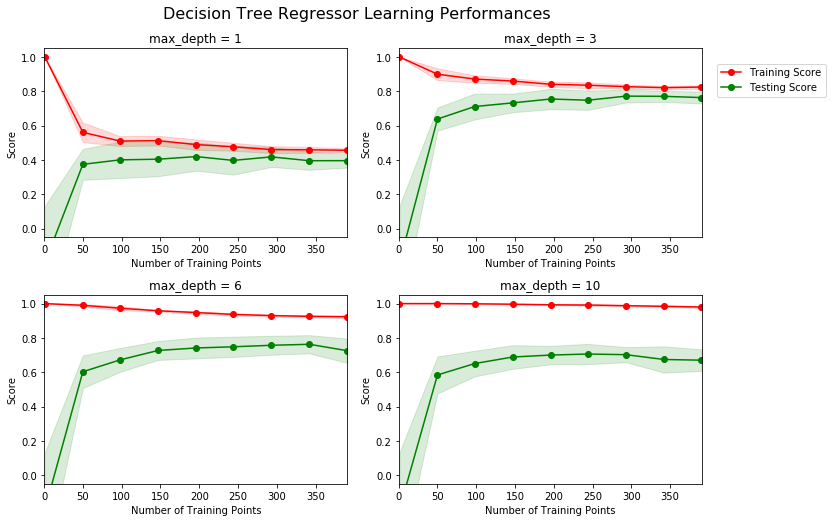

In [7]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e profundidades máximas
vs.ModelLearning(features, prices)

### Questão 4 - Compreendendo os Dados
*Escolha um dos gráficos acima e determine a profundidade máxima para o modelo. O que acontece com a pontuação da curva de treinamento se mais pontos de treinamento são adicionados? E o que acontece com a curva de teste? Ter mais pontos de treinamento beneficia o modelo?*  
**Dica:** As curvas de aprendizagem convergem para uma pontuação em particular?

**Resposta: **

Pelos gráficos acima, pode-se identificar que a profundidade máxima ideal é de 3 níveis, pois as curvas de treinamento e de validação convergem para um valor de erro menor (maior score) com o aumento do número de pontos de treinamento.

À medida que novos pontos de treinamento são adicionados, nos modelos bem ajustados ou que estão undefitting, a curva de validação descresce em valor de score, convergindo para um mesmo score que a curva de treinamento. Nos modelos que estão overfitting, as curvas não convergem para o mesmo valor de score. A curva de treinamento se mantém com um alto score, mas a curva de validação converge para um score bem mais baixo.

Podemos dizer que mais pontos de treinamento beneficia o modelo até um certo limite. Analisando as curvas, vemos que depois de uma certa quantidade, não conseguimos diminuir o erro.

### Curvas de Complexidade
A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a **curva de aprendizagem**, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função `performance_metric`.  

Execute a célula de código abaixo e utilize o gráfico para responder as duas questões a seguir.

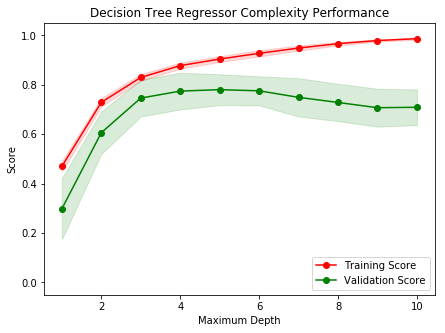

In [8]:
vs.ModelComplexity(X_train, y_train)

### Questão 5 - Equilíbrio entre viés e variância
*Quando o modelo é treinado com o profundidade máxima 1, será que o modelo sofre mais de viés (erro sistemático) ou variância (erro aleatório)? E o que acontece quando o modelo é treinado com profundidade máxima 10? Quais pistas visuais existem no gráfico para justificar suas conclusões?*  
**Dica:** Como você sabe que um modelo está experimentando viés alto ou variância alta?

**Resposta: **

Na profundidade máxima 1, o modelo está underfitting e sofre de maior viés, dado que ele não reflete a complexidade do conjunto de dados. No gráfico, podemos observar que tanto a curva de treinamento quanto a de validação possuem valores de score baixos (alto erro).

Na profundidade máxima 10, o modelo está overfitting e sofre de maior variância, dado que ele acaba memorizando o conjunto de dados de treinamento e não generaliza o suficiente para obter uma boa performance no conjunto de validação. No gráfico, podemos observar que a curva de treinamento possui um alto valor de score, enquanto que a curva de validação se mantém com um valor bem mais baixo.

### Questão 6 - Modelo Ótimo de Melhor Suposição
*Qual profundidade máxima (`'max_depth'`) você acredita que resulta em um modelo que melhor generaliza um dado desconhecido? Que intuição te levou a essa resposta?*

**Resposta: **

Pelo gráfico, vemos que a profundidade máxima é de 5 níveis, pois nesse ponto, o valor de score da curva de validação é máximo.

-----

## Avaliando o Desempenho do Modelo
Nesta parte final do projeto, você irá construir um modelo e fazer uma estimativa de acordo com o conjunto de atributos do cliente utilizando um modelo otimizado a partir de `fit_model`.

### Questão 7 - Busca em Matriz
*O que é a técnica de busca em matriz (*grid search*) e como ela pode ser aplicada para otimizar um algoritmo de aprendizagem?*

**Resposta: **

O *grid search*, ou busca em matriz, é utilizado para se determinar o melhor ajuste de hiper-parâmetros do algoritmo de aprendizagem, quando se têm mais de um hiper-parâmetro.

Cria-se uma matriz n-dimensional em que cada dimensão representa os valores possíveis para um determinado hiper-parâmetro. Em seguida, calculam-se os valores de uma determinada métrica de performance aplicando-se todas as configurações possíveis de hiper-parâmetros contidos na matriz. Por fim, procura-se a configuração com a melhor performance, e dessa forma otimiza-se o desempenho do algoritmo com a definição dos hiper-parâmetros encontrados.

### Questão 8 - Validação Cruzada
*O que é a técnica de treinamento de validação-cruzada k-fold? Quais benefícios essa técnica proporciona para busca em matriz ao otimizar um modelo?*  
**Dica:** Assim como há um raciocínio por trás de utilizar um conjunto de teste, o que poderia dar errado ao utilizar busca em matriz sem um conjunto de validação cruzada?

**Resposta: **

A técnica de treinamento de validação-cruzada k-fold consiste em dividir o conjunto de dados em *k* subconjuntos, e calcular a performance de um determinado modelo com determinados parâmetros *k* vezes, cada vez utilizando um subconjunto de dados como conjunto de validação e os demais como conjunto de treinamento, e em seguida tirar a média dos valores obtidos.

Essa técnica traz como benefício o fato de poder utilizar mais dados para o treinamento (dado que não mais dedicaremos um conjunto fixo de dados somente para validação) e ao mesmo tempo garantir que a validação funcionará (apesar de dados de treinamento estarem sendo usados para validação). Além disso, essa técnica também diminui o risco de vieses escondidos na separação dos conjuntos de treinamento e validação.

### Implementação: Ajustar um Modelo
Na sua última implementação, você vai precisar unir tudo o que foi aprendido e treinar um modelo utilizando o **algoritmo de árvore de decisão**. Para garantir que você está produzindo um modelo otimizado, você treinará o modelo utilizando busca em matriz para otimizar o parâmetro de profundidade máxima (`'max_depth'`) para uma árvore de decisão. Esse parâmetro pode ser entendido como o número de perguntas que o algoritmo de árvore de decisão pode fazer sobre os dados antes de fazer uma estimativa. Árvores de decisão são parte de uma classe de algoritmos chamados *algoritmos de aprendizagem supervisionada*.

Para a função `fit_model` na célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize o [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) do `sklearn.tree` para gerar um objeto regressor de árvore de decisão.
  - Atribua esse objeto à variável `'regressor'`.
- Gere um dicionário para `'max_depth'` com os valores de 1 a 10 e atribua isso para a variável `'params'`.
- Utilize o [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) do `sklearn.metrics` para gerar um objeto de função de pontuação.
  - Passe a função `performance_metric` como um parâmetro para esse objeto.
  - Atribua a função de pontuação à variável `'scoring_fnc'`.
- Utilize o [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) do `sklearn.grid_search` para gerar um objeto de busca por matriz.
  - Passe as variáveis `'regressor'`, `'params'`, `'scoring_fnc'` and `'cv_sets'` como parâmetros para o objeto. 
  - Atribua o objeto `GridSearchCV` para a variável `'grid'`.

In [9]:
# Importar 'make_scorer', 'DecisionTreeRegressor' e 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor()

    # Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = { 'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10) }

    # Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Gerar o objeto de busca em matriz
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

### Fazendo Estimativas
Uma vez que o modelo foi treinado em conjunto de dados atribuído, ele agora pode ser utilizado para fazer estimativas em novos conjuntos de entrada de dados. No caso do *regressor da árvore de decisão*, o modelo aprendeu *quais são as melhores perguntas sobre a entrada de dados*, e pode responder com uma estimativa para a **variável alvo**. Você pode utilizar essas estimativas para conseguir informações sobre os dados dos quais o valor da variável alvo é desconhecida – por exemplo, os dados dos quais o modelo não foi treinado.

### Questão 9 - Modelo Ótimo
_Qual profundidade máxima do modelo ótimo? Como esse resultado se compara com a sua suposição na **Questão 6**?  

Executar a célula de código abaixo para ajustar o regressor da árvore de decisão com os dados de treinamento e gerar um modelo ótimo.

In [10]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, y_train)

# Produzir valores para 'max_depth'
print "O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth'])

O parâmetro 'max_depth' é 5 para o modelo ótimo.


**Resposta: **

O código forneceu como resultado que a profundidade máxima é 5, como havia sido previsto na questão 6, na qual vemos pelo gráfico que a profundidade 5 fornece um menor valor de erro.

### Questão 10 -Estimando Preços de Venda
Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de quartos em um imóvel | 5 quartos | 4 quartos | 8 quartos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |
*Qual valor você sugeriria para cada um dos seus clientes para a venda de suas casas? Esses preços parecem razoáveis dados os valores para cada atributo?*  
**Dica:** Utilize as estatísticas que você calculou na seção **Explorando Dados** para ajudar a justificar sua resposta.  

Execute a célula de códigos abaixo para que seu modelo otimizado faça estimativas para o imóvel de cada um dos clientes.

In [11]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print "Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price)

Preço estimado para a casa do cliente 1: $419,700.00
Preço estimado para a casa do cliente 2: $287,100.00
Preço estimado para a casa do cliente 3: $927,500.00


**Resposta: **

As estimativas fornecidas pelo modelo parecem bem razoáveis. Todos os preços estimados se encontram dentro do intervalo entre o menor valor observado e o maior valor observado, e estão de acordo com a intuição inicial sobre o impacto dos atributos nos preços.

Vamos que o imóvel do cliente 2 possui uma média de quartos menor, um maior nível de pobreza e uma razão estudantes:professor maior na vizinhança, o que levaria a crer que seu preço deveria ser inferior ao dos outros imóveis.

Inversamente, o imóvel do cliente 3 possui um grande número médio de quartos, um baixo nível de pobreza e uma menor razão estudantes:professor na vizinhança, fazendo com que seu preço seja maior do que os outros imóveis.

O imóvel do cliente 1 possui os atributos com valores não tão extremos, fazendo com que seu preço se aproxime do preço médio dos imóveis observados.

### Sensibilidade
Um modelo ótimo não é necessariamente um modelo robusto. Às vezes, um modelo é muito complexo ou muito simples para generalizar os novos dados. Às vezes, o modelo pode utilizar um algoritmo de aprendizagem que não é apropriado para a estrutura de dados especificado. Outras vezes, os próprios dados podem ter informação excessiva ou exemplos insuficientes para permitir que o modelo apreenda a variável alvo – ou seja, o modelo não pode ser ajustado. Execute a célula de código abaixo para rodar a função `fit_model` dez vezes com diferentes conjuntos de treinamento e teste para ver como as estimativas para um cliente específico mudam se os dados foram treinados.

In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Questão 11 - Aplicabilidade
*Em poucas linhas, argumente se o modelo construído deve ou não ser utilizado de acordo com as configurações do mundo real.*  
**Dica:** Algumas questões para responder:
- *Quão relevante dados coletados em 1978 podem ser nos dias de hoje?*
- *Os atributos presentes são suficientes para descrever um imóvel?*
- *Esse modelo é robusto o suficiente para fazer estimativas consistentes?*
- *Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?*

**Resposta: **

Embora os dados utilizados tenham sido alterados para corrigir a inflação do mercado desde 1978, é difícil dizer que o modelo poderá fazer previsões acuradas dada a realidade dos dias de hoje. Os atributos do modelo podem ser ainda considerados como bons indicativos do preço, mas é importante ressaltar que desde 1978 os padrões de consumo da sociedade mudaram de forma significativa, e provavelmente muitos outros fatores devem acabar por influenciar o preço dos imóveis.

O modelo faz estimativas relativamente consistentes (se analisarmos o valor obtido na seção anterior), mas é capaz que ele não consiga refletir de forma acurada a realidade atual e nem a realidade de outras localidades (como uma cidade rural) nas quais outros fatores podem vir a ser mais importantes. Para verificarmos realmente se o modelo poderia ser utilizado ou não, seria interessante aplicá-lo para fazer estimativas de preços de compará-las com preços atuais do mercado.